In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)
#data = data.drop(data.columns[-1], axis=1)
data = data.dropna()
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


(20433, 9)


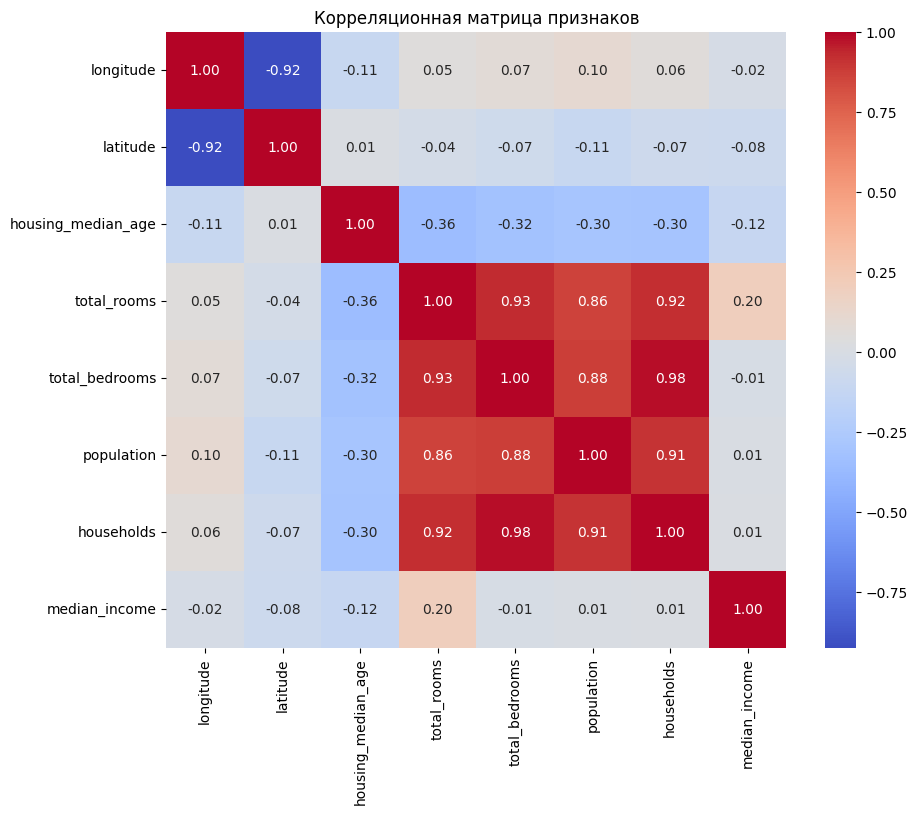

Средняя квадратичная ошиьбка: 4723808755.314901
Средняя абсолютная ошибка (MAE): 43305.10692439442
Средняя абсолютная ошибка (MAPE): 22.90436188719767
R2 Score: 0.6545706540030468


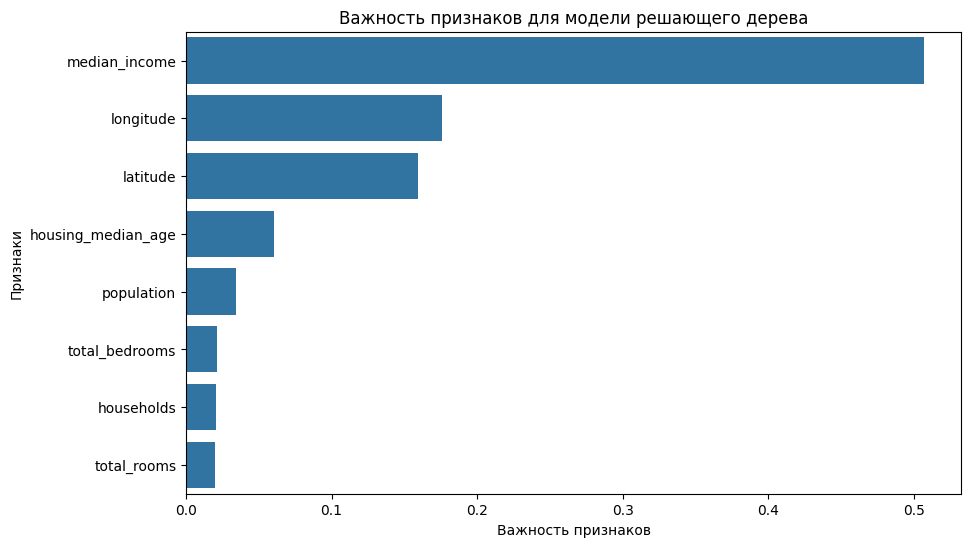

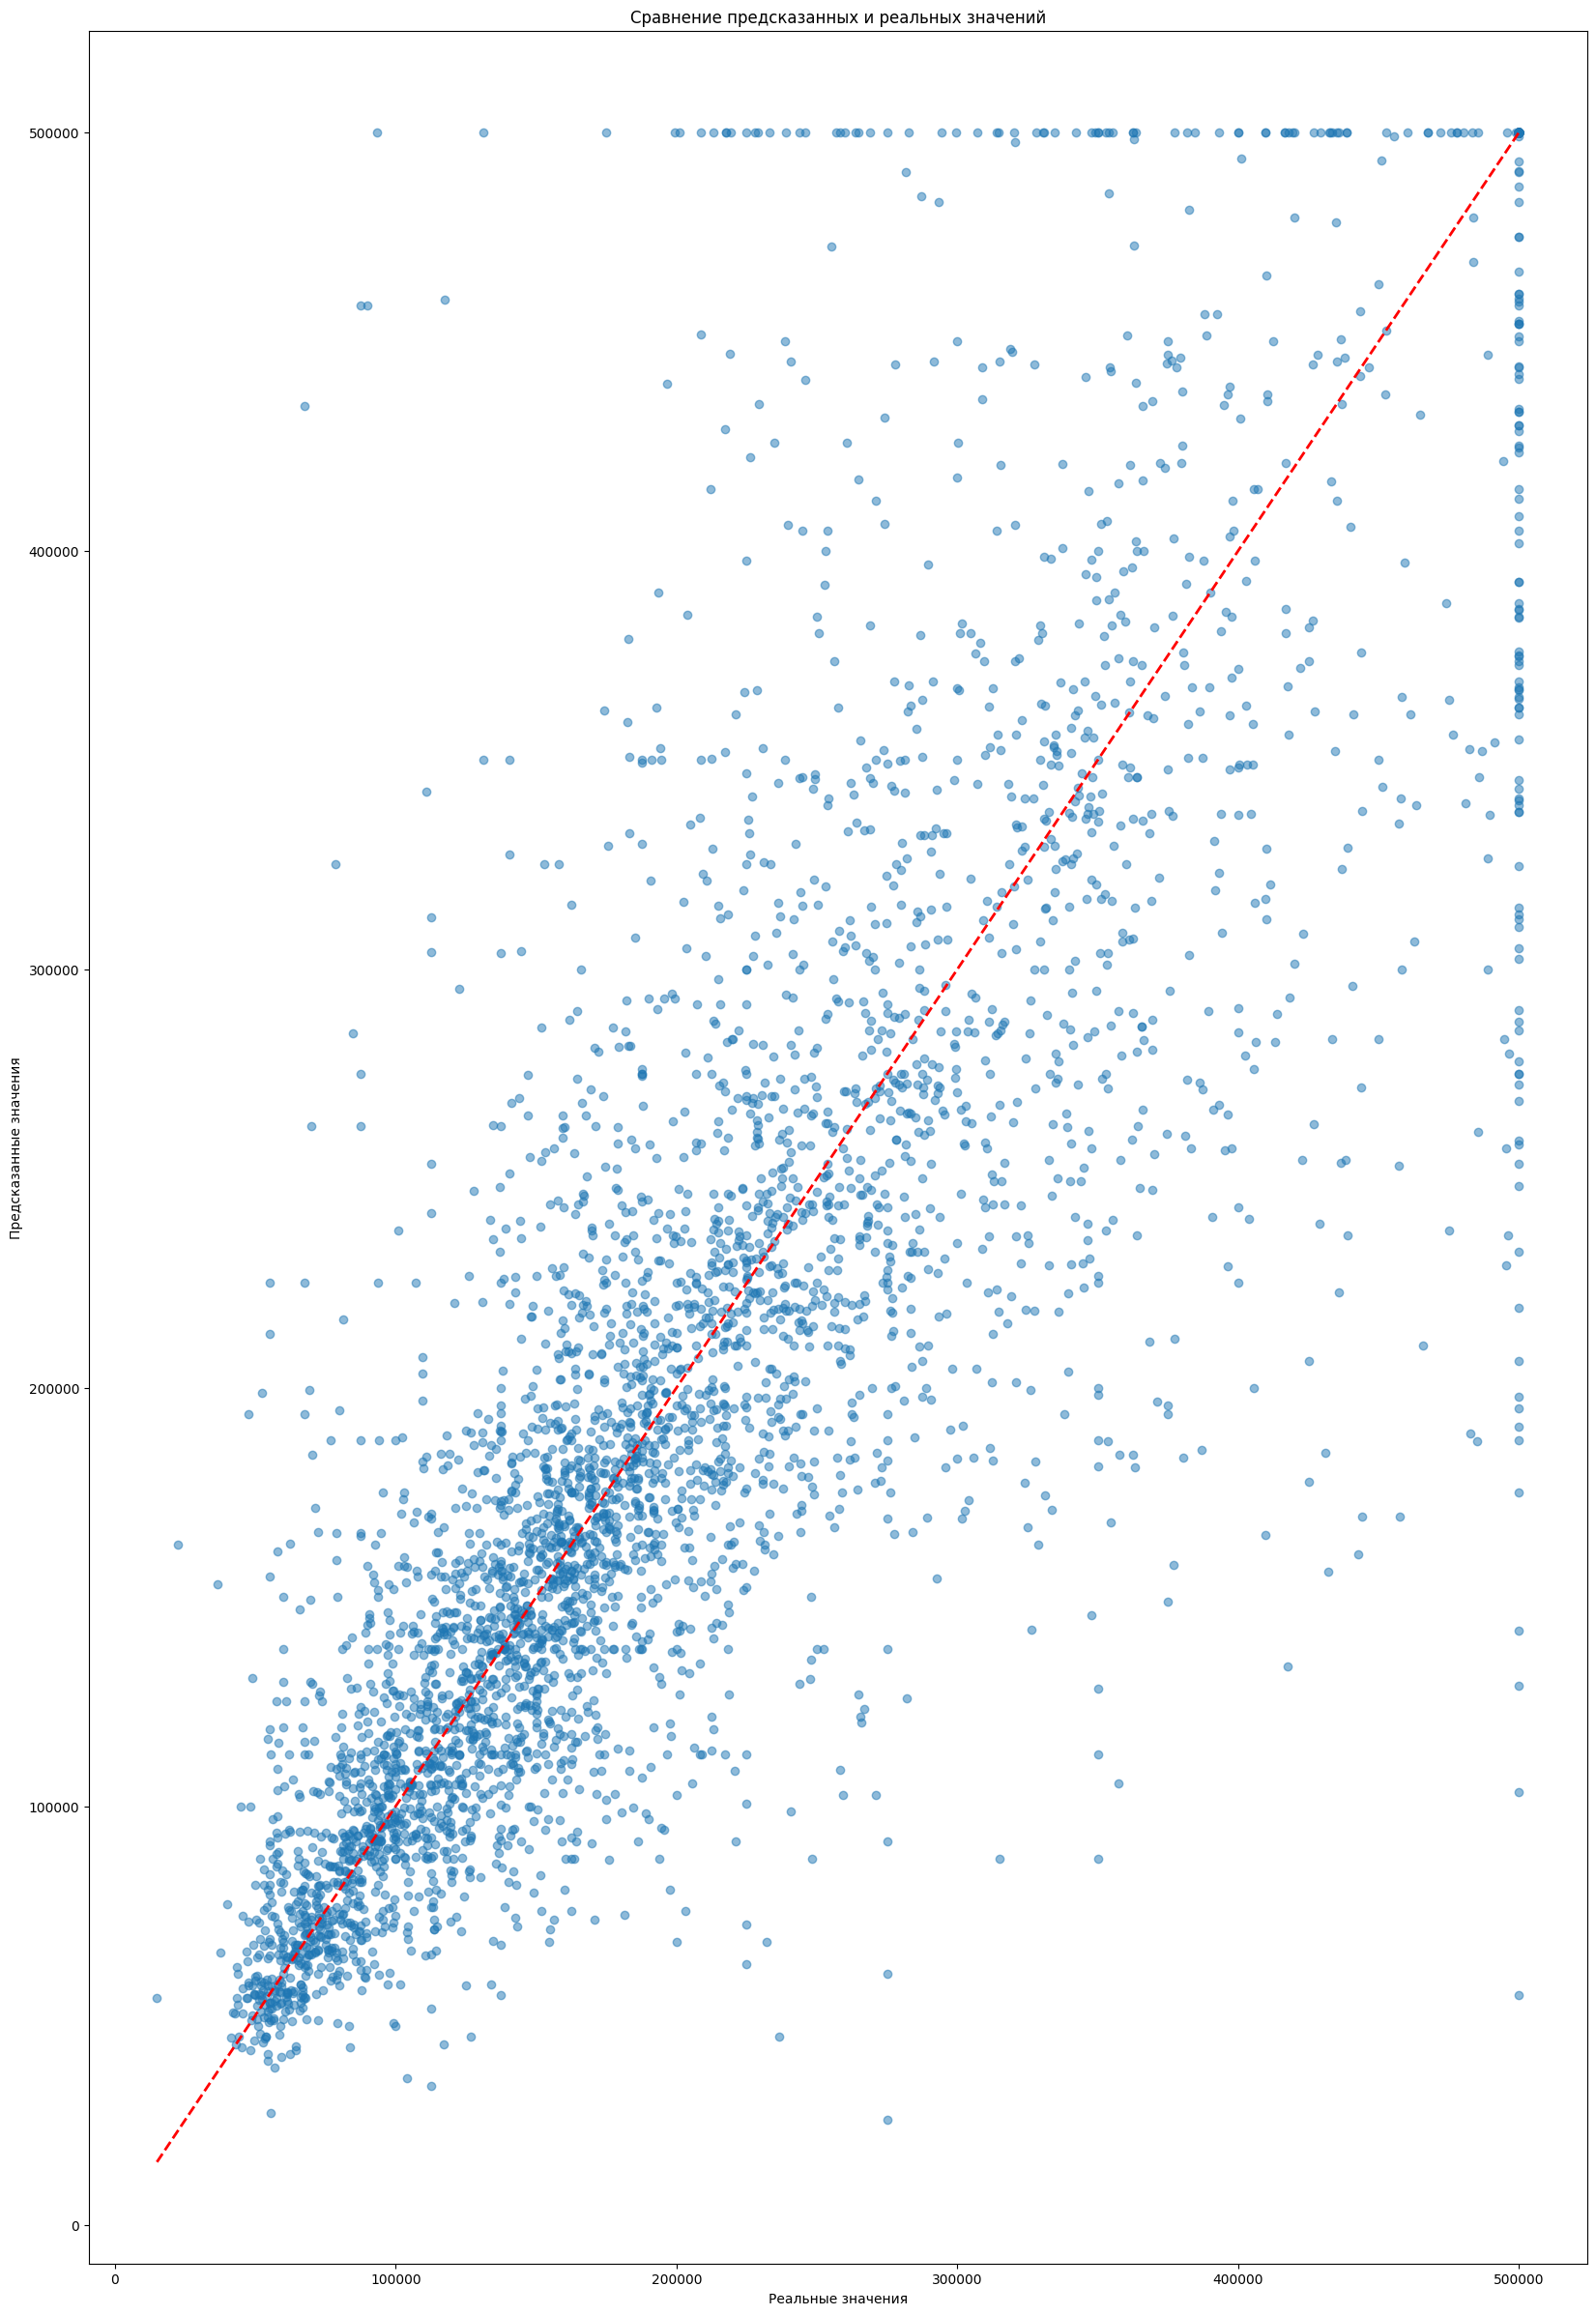

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)
data = data.drop(data.columns[-1], axis=1)
data = data.dropna()

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

print(data.shape)
corr_matrix = X.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Предсказание и оценка точности модели
def metrica(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2: {r2}")
    return mae, mse, r2

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Средняя квадратичная ошиьбка: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Средняя абсолютная ошибка (MAPE): {mape}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Важность признаков")
plt.ylabel("Признаки")
plt.title("Важность признаков для модели решающего дерева")
plt.show()

plt.figure(figsize=(20, 30))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение предсказанных и реальных значений")
plt.show()


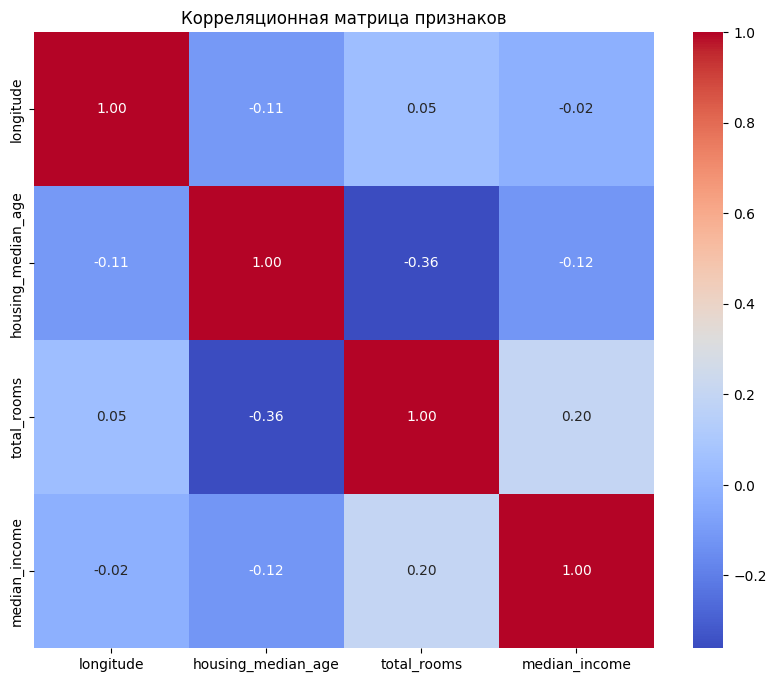

Mean square Error: 9253220290.340837
Средняя абсолютная ошибка (MAE): 64307.12576461952
Средняя абсолютная ошибка (MAPE): 36.26632533334572
R² Score: 0.323356638927882


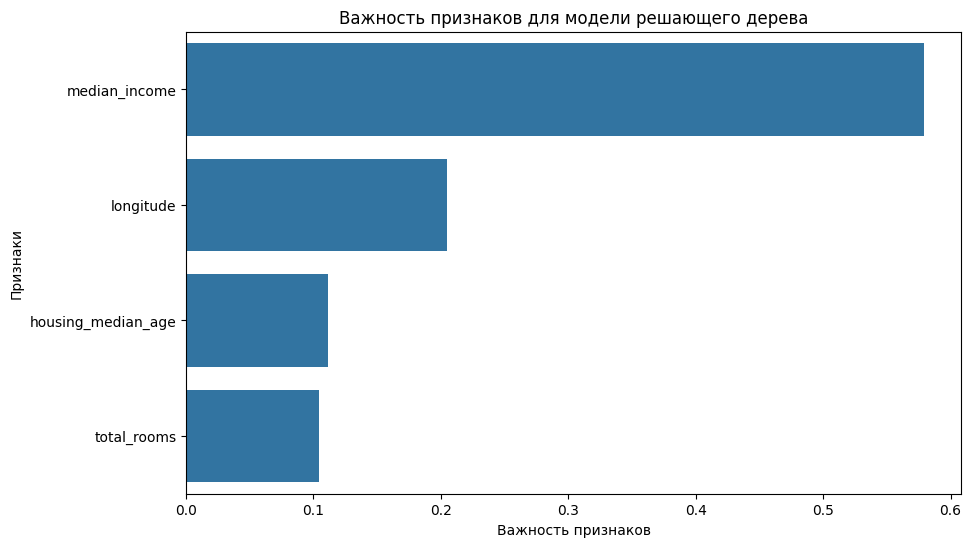

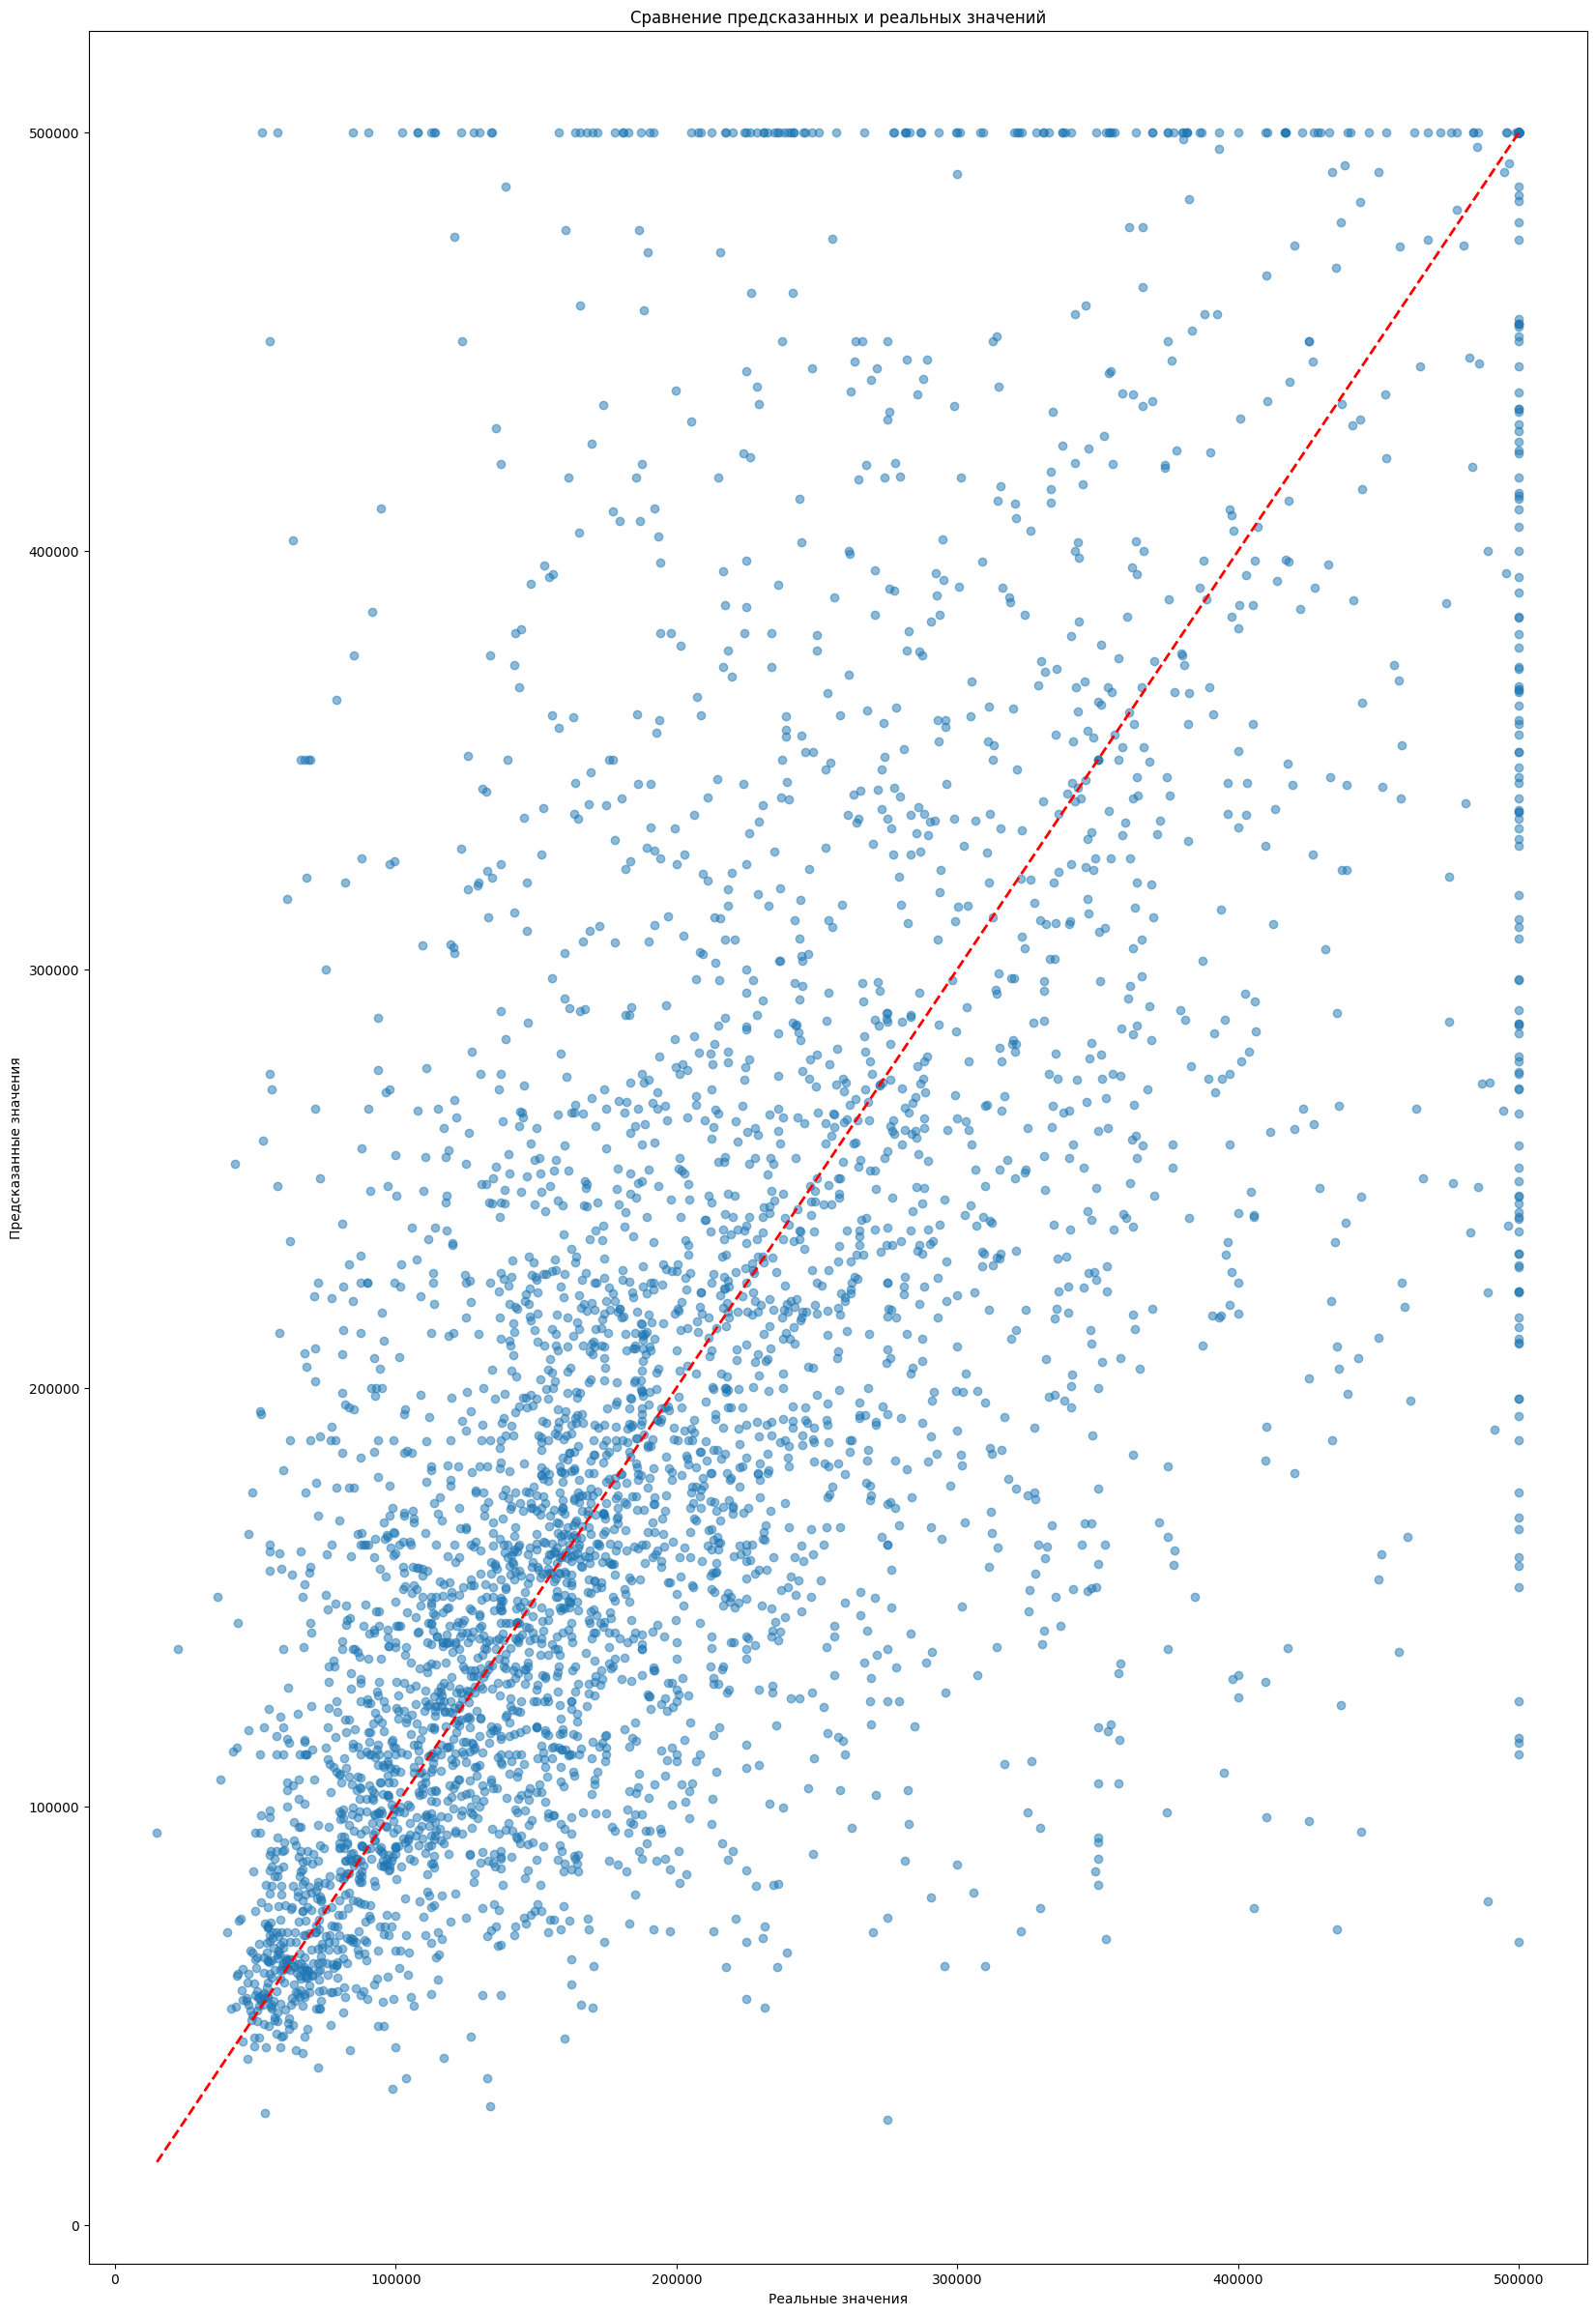

In [ ]:
data.drop("total_bedrooms", axis = 1, inplace = True)
data.drop("population", axis = 1, inplace = True)
data.drop("households", axis = 1, inplace = True)
data.drop("latitude", axis = 1, inplace = True)


X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

corr_matrix = X.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)




y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean square Error: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Средняя абсолютная ошибка (MAPE): {mape}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Важность признаков")
plt.ylabel("Признаки")
plt.title("Важность признаков для модели решающего дерева")
plt.show()

plt.figure(figsize=(20, 30))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение предсказанных и реальных значений")
plt.show()






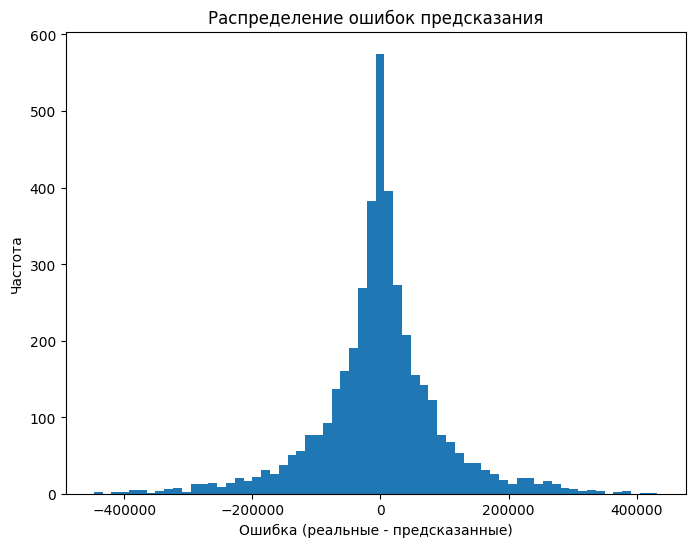

p-value = 7.967533822588554e-38


In [ ]:
import numpy as np
from scipy import stats

errors = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errors, bins = 64)
plt.xlabel("Ошибка (реальные - предсказанные)")
plt.ylabel("Частота")
plt.title("Распределение ошибок предсказания")
plt.show()

shapiro_test = stats.shapiro(errors)
print(f"p-value = {shapiro_test.pvalue}")


In [ ]:

from sklearn.linear_model import LinearRegression


model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,
    min_samples_split=100,
    random_state=42
)
model.fit(X_train, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean square Error: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Средняя абсолютная ошибка (MAPE): {mape}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

modelreg = LinearRegression()
modelreg.fit(X_train, y_train)
y_pred = modelreg.predict(X_test)

y_pred = modelreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean square Error: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Средняя абсолютная ошибка (MAPE): {mape}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")





Mean square Error: 5992012450.789125
Средняя абсолютная ошибка (MAE): 56259.22651222151
Средняя абсолютная ошибка (MAPE): 33.527710697455795
R² Score: 0.5618330357356499
Mean square Error: 6645091061.9297905
Средняя абсолютная ошибка (MAE): 60899.33913524083
Средняя абсолютная ошибка (MAPE): 37.536230624591006
R² Score: 0.5140765474406703
